In [26]:
import h5py
import numpy as np
from matplotlib import rc
rc('font',**{'size':'10','family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
rc('text.latex', preamble='\\usepackage{amsmath},\\usepackage{amssymb}')
rc('text', usetex=True)
rc('font', size=10)
from scipy.optimize import fmin
from scipy.ndimage.filters import *
import matplotlib.pyplot as plt
from scipy import interpolate

from os.path import expanduser
home = expanduser("~")
if home == '/home/sma74':
    home = '/local/scratch/public/sma74-dropbox'
    
Folder = home+'/Dropbox/PhD/Projects/Reconstruction/'

f = h5py.File(Folder+'Data/correlation_data.h5','r')
#print(f['corr_coeff'][0,1][:])
print(f['correlations'])
def num2str(num, precision):
	return "%0.*f" % (precision, num)

legnd = [r'$r_{\text{gs}}$',r'$r_{\text{gt}}$',r'$r_{\text{st}}$']
def plot_r():
    fig=plt.figure(figsize=(10,7))
    axis= [0.02,0.5,0,1]
    for ihalo in range(0,5):
        ax=plt.subplot(230+ihalo+1)
        for i in range(0,3):
            ax.plot(f['kavg'][:],np.abs(f['corr_coeff'][3+i,ihalo][:]), lw=1.5, label=legnd[i])
            #ax.grid(linestyle='dotted', linewidth=0.5)
            plt.xscale('log')
            if ihalo==0:
                plt.legend(loc='upper left',ncol=1, fontsize=15)
            if ihalo==1 or ihalo==2 or ihalo==4:
                ax.set_yticks([0])
                ax.set_yticklabels([]) # remove the y-axis ticks
            else:
                plt.ylabel(r'$r_{\alpha\beta}$', fontsize=18)
            if ihalo==0 or ihalo==1:
                ax.set_xticks([0])
                ax.set_xticklabels([]) # remove the y-axis ticks
            else:
                plt.xlabel(r'$k$ $ [h$ Mpc$^{-1}$]', fontsize=15)
            ax.text(0.3,0.9,'bin '+num2str(ihalo+1,0), fontsize=13)
            plt.axis(axis)

            ax.axvline(0.1, color='gray',ls='dotted', lw=0.5)

    plt.subplots_adjust(hspace=0,wspace=0) # remove spacings
    fig.savefig(Folder+'Figures/correlation_coefficient.pdf',bbox_inches='tight')
    plt.show()

<HDF5 dataset "correlations": shape (3, 3, 5, 15, 49), type "<f8">


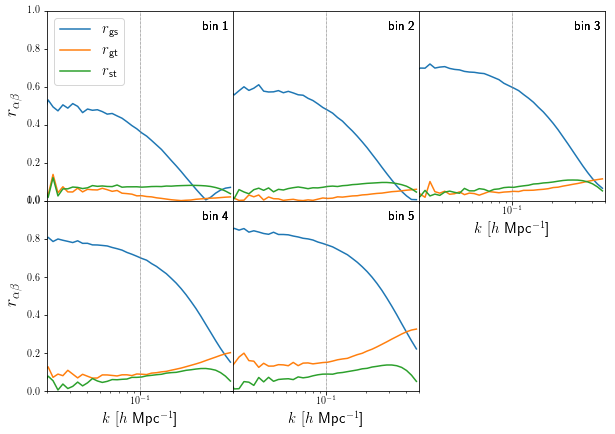

In [28]:
plot_r()